In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)

y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [3]:
# y

In [4]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)

y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

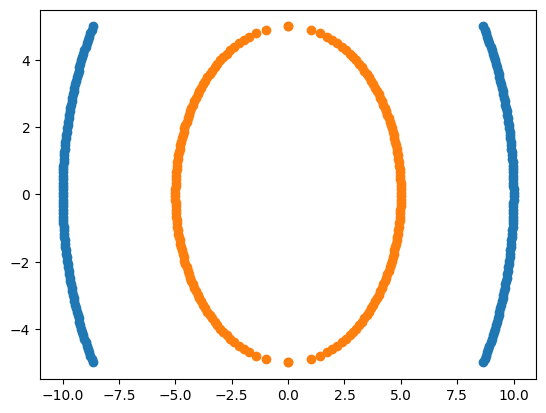

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [6]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T, columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=df1.append(df2)
df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_12960\143178032.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


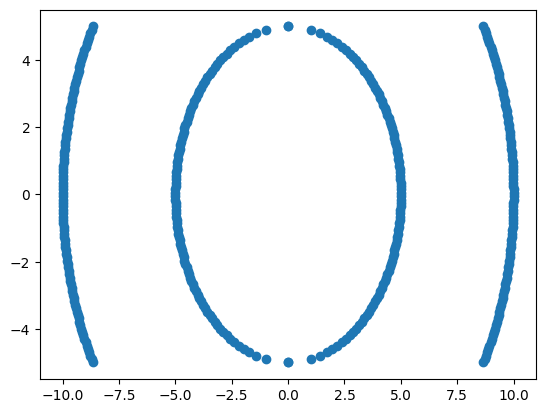

In [7]:
plt.scatter(x=df['X1'],y=df['X2'])

In [8]:
import seaborn as sns

<AxesSubplot: xlabel='X1', ylabel='X2'>

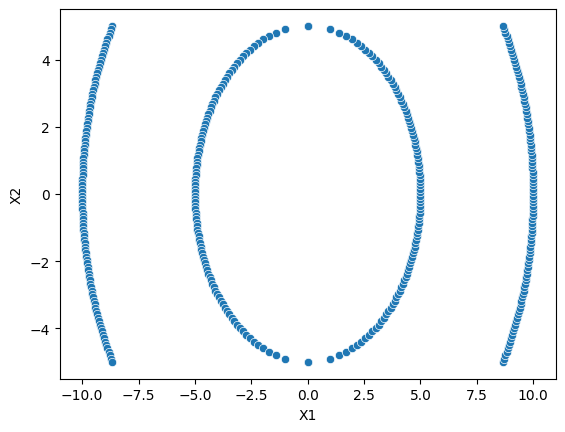

In [9]:
sns.scatterplot(x=df['X1'],y=df['X2'])

In [10]:

df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [11]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [28]:
x=df.iloc[:,:-1]
y=df['Y']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
x_train.head()

,X1,X2,Y,X1_square,X2_square
50,4.999745,0.050505,1,24.997449,0.002551
63,9.906589,1.363636,0,98.140496,1.859504
112,-3.263736,3.787879,1,10.651974,14.348026
159,-9.953852,-0.959596,0,99.079176,0.920824
83,3.680983,3.383838,1,13.549638,11.450362


## polynomial kernal
K(x,y)=(x**2y+c)**d

In [15]:
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']

In [16]:
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [35]:
x=df[['X1_square','X2_square','X1*X2']]
y=df['Y']

In [42]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [36]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel='sigmoid')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.76